<a href="https://colab.research.google.com/github/ManoMax/google-collabs/blob/main/Mini_projeto1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Miniprojeto I - Inteligência Artificial
Integrantes do grupo:
* Dante Costa - dante.costa@ccc.ufcg.edu.br
* Gabriel Matos - gabriel.matos@ccc.ufcg.edu.br
* Gabriel Nascimento - gabriel.nascimento.santos@ccc.ufcg.edu.br
* Gabryelle Soares - gabryelle.almeida@ccc.ufcg.edu.br
* Kaio Araujo - kario.araujo@ccc.ufcg.edu.br

O artigo _Evolutionary Heuristic A* Search: Heuristic Function Optimization via Genetic Algorithm_ propõe um novo método denominado Busca Heurística A* Evolucionária (EHA\*) que tem o intuito de minimizar o esforço no projeto de funções heurísticas via Algoritmos Genéticos. Este notebook conta com a implementação do algoritmo A* e a sua aplicação em um dos problemas representados no artigo, sendo este o _Sliding Tile Puzzle_.

## Representação de estados

Considerando que o tabuleiro é de tamanho 4x4 para o Sliding Tiles Puzzle, temos 4 arrays para cada linha do tabuleiro com números de 0 a 15

In [ ]:
def solvedBoard(n):
    board = []
    j = 0
    for i in range(0, n*n, n):
        board.append(list(range(i, i+n)))
        
    return board

solvedBoard(4)

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]

## Classe NodePuzzle

In [ ]:
class NodePuzzle:
    def __init__(self, state, dimensions=None, parentNode=None, childNodes=[], gcost=0, totalCost=None):
        # Estado do tabuleiro com as listas
        self.state = state
         # Dimensão NxN onde N = número de linhas = número de colunas
        self.dimensions = dimensions
        # Referência para o nó pai
        self.parentNode = parentNode
        # Lista com os nós filhos
        self.childNodes = childNodes
        # O quanto esse nó vai estar longe do inicial (G)
        self.gcost = gcost
        #Custo total (G+H)
        self.totalCost = None
    
    def __str__(self):
        for row in self.state:
            print (''.join(str(row)))

    # Compara o tabuleiro de resposta esperado em sua respectiva dimensão
    def isSolved(self):
        return self.state == solvedBoard(self.dimensions)

    # Função que verifica se é possível resolver        
    def isSolvable(self):
        inversions = 0
        all_numbers = [number for row in self.state for number in row]
        all_numbers.remove(0)

        # Contagem de inversão tirando o 0 porque ele é a representação do vazio
        for i in range(len(all_numbers)): 
            for j in range(i + 1, len(all_numbers)): 
                if (all_numbers[i] > all_numbers[j]): 
                    inversions += 1

        if (len(self.state) % 2 != 0 and inversions % 2 == 0) or (len(self.state) % 2 == 0 and inversions % 2 != 0):
            return True
            
        return False        

    # Verifica as dimensões e se o tabuleiro é efetivamente um quadrado (condição do jogo)
    def getDimensions(self):
        nRows = len(self.state)
        for row in self.state:
            if len(row) != nRows:
                return False
            else:
                self.dimensions = nRows
    
    # Verifica se não tem nenhum número repetido
    def notRepeatedNumbers(self):
        unique = []
        for row in self.state:
            for number in row:
                if number not in unique:
                    unique.append(number)
                else:
                    return False
        return True

## Definição das Heurísticas

In [ ]:
# Colisões lineares

def h1(state):
    heuristic = 0
    solved_board = solvedBoard(len(state))

    transposed_state = list(map(list, zip(*state)))
    transposed_solved = list(map(list, zip(*solved_board)))
    for i in range(len(state)):
        for j in range(len(state)):
            if state[i][j] != solved_board[i][j] and state[i][j] in solved_board[i] and state[i][j] != 0:
                heuristic += 1
            if transposed_state[i][j] != transposed_solved[i][j] and transposed_state[i][j] in transposed_solved[i] and transposed_state[i][j] != 0:
                heuristic += 1

    return heuristic

In [ ]:
# Distância de manhattan

def h2(state):
    heuristic = 0
    solved_board = solvedBoard(len(state))

    for i in range(len(state)):
        for j in range(len(state)):
            for k in range(len(solved_board)):
                for l in range(len(solved_board)):
                    if state[i][j] == solved_board[k][l] and state[i][j] != 0:
                        heuristic += abs(i-k) + abs(j-l)
                        break

    return heuristic

In [ ]:
# Distância Euclidiana

def h3(state):
    heuristic = 0
    solved_board = solvedBoard(len(state))
    
    for row in range(len(state)):
        for col in range(len(state[0])):
            pos = get_pos(solved_board, state[row][col])
            heuristic += abs(row - pos[0]) + abs(col - pos[1])
            
    return heuristic

def get_pos(state, element):
    for row in range(len(state)):
        if element in state[row]:
            return (row, state[row].index(element))

In [ ]:
heuristics = [h1, h2, h3]

In [ ]:
#multiweight ideia inicial(Heurística combinando as outras) descartar
import numpy as np

weights=[1,1,1]

def multi(state, weights=weights):
    return state + sum([np.multiply(h(state), w) for h, w in zip(heuristics, weights)])
    #solved_board = solvedBoard(len(state))
    #return h1*weights[0]+h2*weights[1]+h3(state)*weights[2]

In [ ]:
def multiweight(state):
    ##Manhattan
    h1 = 0
    ##Misplaced Tiles
    h2 = 0
    ##Euclidean
    h3 = 0
    solved_board = solvedBoard(len(state))
    
    ##Manhattan
    for i in range(len(state)):
        for j in range(len(state)):
            for k in range(len(solved_board)):
                for l in range(len(solved_board)):
                    if state[i][j] == solved_board[k][l] and state[i][j] != 0:
                        h1 += abs(i-k) + abs(j-l)
                        break
    
    ##Colisões lineares
    transposed_state = list(map(list, zip(*state)))
    transposed_solved = list(map(list, zip(*solved_board)))
    for i in range(len(state)):
        for j in range(len(state)):
            if state[i][j] != solved_board[i][j] and state[i][j] in solved_board[i] and state[i][j] != 0:
                h2 += 1
            if transposed_state[i][j] != transposed_solved[i][j] and transposed_state[i][j] in transposed_solved[i] and transposed_state[i][j] != 0:
                h2 += 1
    ## distancia euclidiana
    for row in range(len(state)):
        for col in range(len(state[0])):
            pos = get_pos(solved_board, state[row][col])
            h3 += abs(row - pos[0]) + abs(col - pos[1])
    
    
    return 1*h1 + 1*h2 + 1*h3

## Novos tabuleiros

As quatro funções abaixo servem para mover o vazio/zero a partir de um estado do tabuleiro e fazer uma troca entre o 0 e o que for adjacente:

In [ ]:
def moveLeft(state, empty):
    state[empty[0]][empty[1]], state[empty[0]][empty[1]-1] = state[empty[0]][empty[1]-1], state[empty[0]][empty[1]]

def moveRight(state, empty):
    state[empty[0]][empty[1]], state[empty[0]][empty[1]+1] = state[empty[0]][empty[1]+1], state[empty[0]][empty[1]]
    
def moveTop(state, empty):
    state[empty[0]][empty[1]], state[empty[0]-1][empty[1]] = state[empty[0]-1][empty[1]], state[empty[0]][empty[1]]

def moveBottom(state, empty):
    state[empty[0]][empty[1]], state[empty[0]+1][empty[1]] = state[empty[0]+1][empty[1]], state[empty[0]][empty[1]]

In [ ]:
# Validação nos cantos do tabuleiro
# 4 casos

import copy

def findChildNodes(Node):
        Node.childNodes = []
        n = len(Node.state)-1
        for i in range(n+1):
            for j in range(n+1):
                if Node.state[i][j] == 0:
                    zero_position = (i, j)

        possible_board1 = copy.deepcopy(Node.state)

        # Quina da esquerda em cima
        if (zero_position[0] == 0) and (zero_position[1] == 0):
            moveRight(possible_board1, zero_position)
            addPuzzle(Node, possible_board1)

            possible_board2 = copy.deepcopy(Node.state)
            moveBottom(possible_board2, zero_position)
            addPuzzle(Node, possible_board2)

        # Quina da direita em cima
        elif (zero_position[0] == 0) and (zero_position[1] == n):
            moveBottom(possible_board1, zero_position)
            addPuzzle(Node, possible_board1)

            possible_board2 = copy.deepcopy(Node.state)
            moveLeft(possible_board2, zero_position)
            addPuzzle(Node, possible_board2)

        # Quina da esquerda embaixo
        elif (zero_position[0] == n) and (zero_position[1] == 0):
            moveTop(possible_board1, zero_position)
            addPuzzle(Node, possible_board1)

            possible_board2 = copy.deepcopy(Node.state)
            moveRight(possible_board2, zero_position)
            addPuzzle(Node, possible_board2)

        # Quina da direita embaixo
        elif (zero_position[0] == n) and (zero_position[1] == n):
            moveTop(possible_board1, zero_position)
            addPuzzle(Node, possible_board1)

            possible_board2 = copy.deepcopy(Node.state)
            moveLeft(possible_board2, zero_position)
            addPuzzle(Node, possible_board2)

        # Parede de cima sem quina
        elif (zero_position[0] == 0) and (zero_position[1] != 0) and (zero_position[1] != n):
            moveLeft(possible_board1, zero_position)
            addPuzzle(Node, possible_board1)

            possible_board2 = copy.deepcopy(Node.state)
            moveRight(possible_board2, zero_position)
            addPuzzle(Node, possible_board2)

            possible_board3 = copy.deepcopy(Node.state)
            moveBottom(possible_board3, zero_position)
            addPuzzle(Node, possible_board3)

        # Parede da esquerda sem quina
        elif (zero_position[1] == 0) and (zero_position[0] != 0) and (zero_position[0] != n):
            moveRight(possible_board1, zero_position)
            addPuzzle(Node, possible_board1)

            possible_board2 = copy.deepcopy(Node.state)
            moveTop(possible_board2, zero_position)
            addPuzzle(Node, possible_board2)

            possible_board3 = copy.deepcopy(Node.state)
            moveBottom(possible_board3, zero_position)
            addPuzzle(Node, possible_board3)

        # Parede da direita sem quina
        elif (zero_position[1] == n) and (zero_position[0] != 0) and (zero_position[0] != n):
            moveLeft(possible_board1, zero_position)
            addPuzzle(Node, possible_board1)

            possible_board2 = copy.deepcopy(Node.state)
            moveTop(possible_board2, zero_position)
            addPuzzle(Node, possible_board2)

            possible_board3 = copy.deepcopy(Node.state)
            moveBottom(possible_board3, zero_position)
            addPuzzle(Node, possible_board3)

        # Parede debaixo sem quina
        elif (zero_position[0] == n) and (zero_position[1] != 0) and (zero_position[1] != n):
            moveLeft(possible_board1, zero_position)
            addPuzzle(Node, possible_board1)

            possible_board2 = copy.deepcopy(Node.state)
            moveTop(possible_board2, zero_position)
            addPuzzle(Node, possible_board2)

            possible_board3 = copy.deepcopy(Node.state)
            moveRight(possible_board3, zero_position)
            addPuzzle(Node, possible_board3)
                
        # Fora das paredes
        elif (zero_position[0] != 0) and (zero_position[0] != n) and (zero_position[1] != 0) and (zero_position[1] != n):
            moveLeft(possible_board1, zero_position)
            addPuzzle(Node, possible_board1)

            possible_board2 = copy.deepcopy(Node.state)
            moveTop(possible_board2, zero_position)
            addPuzzle(Node, possible_board2)

            possible_board3 = copy.deepcopy(Node.state)
            moveRight(possible_board3, zero_position)
            addPuzzle(Node, possible_board3)

            possible_board4 = copy.deepcopy(Node.state)
            moveBottom(possible_board4, zero_position)
            addPuzzle(Node, possible_board4)

# Função auxiliar
def addPuzzle(Node, board):
	  if not(Node.parentNode) or board != Node.parentNode.state:
		    Node.childNodes.append(NodePuzzle(board))

## A*

In [ ]:
# Setar o f como um valor arbitrariamente grande
import math 

# Recebe o estado inicial do sliding tile puzzle e um conjunto de heurísticas
def aStarSearch(state, heuristic):
    
    # Número de passos para resolver, não vale o primeiro nó (fitness function)
    steps = 0
    # Nós expandidos para chegar na solução
    exp = 0
    # Tamanho da fronteira na busca
    max_frontier = 0
    # Caminho ótimo
    opt_path = []
    # "Debug" para erro, se não for resolvível = 2  e se a dimensão ou a montagem for errada = 1
    err = 0
    # Nós já explorados
    explored_nodes = []
    # Nós a serem explorados
    to_be_explored = []
    
    # Nó inicial a partir do estado do tabuleiro, como é primeiro o g tem que ser 0
    currentNode = NodePuzzle(state, gcost = 0)

    # Se as dimensões estiverem erradas ou os números estiverem incorretos, retorna err=-1
    if currentNode.getDimensions() == False or currentNode.notRepeatedNumbers() == False:
        err = -1
        return (steps, exp, max_frontier, opt_path, err)

    # Retorna um erro se a partir do nó atual não for possível chegar na solução
    if currentNode.isSolvable() == False:
        err = -2
        return (steps, exp, max_frontier, opt_path, err)
    
    # Rodar até chegar no estado em que está resolvido
    while not(currentNode.isSolved()):
        #Adicionar o nó aos que foram explorados
        explored_nodes.append(currentNode)
        # Achar os nós filhos
        findChildNodes(currentNode)
        # Guardar pai, o custo G e o custo total de cada nó
        for child in currentNode.childNodes:
            child.parentNode = currentNode
            child.gcost = child.parentNode.gcost + 1
            child.totalCost = child.gcost + heuristic(child.state) #peso*heuristica de cada
            # child.totalCost = child.gcost + sum([h(child.state) * w for h, w in zip(heuristics, weight)])
            ## heuristics[0](child.state)*weight1+heuristics[1](child.state)*weight2+heuristics[2](child.state)*weight3
            # Se o filho não foi explorado, entra na lista de nós a serem explorados
            if (child not in explored_nodes):
                to_be_explored.append(child)
        
        #Se a fronteira passa do máximo adicionando nós filhos, max é o tamanho da lista dos nós a serem explorados
        if len(to_be_explored) > max_frontier:
            max_frontier = len(to_be_explored)
        
        #Achar o menor f na lista dos a serem explorados
        lowest_f = math.inf
        for node in to_be_explored:
            if node.totalCost < lowest_f:
                lowest_f = node.totalCost
                bestNode = node
        
        # O próximo é o na fronteira com valor de f menor
        currentNode = bestNode
        # Remover o nó da fronteira
        to_be_explored.remove(currentNode)
        # Dimensão do nó atual
        currentNode.getDimensions()
        # Incrementar a contagem dos nós expandidos
        exp += 1
    
    # Backtracking do filho ao pai até chegar no primeiro estado para achar o caminho ótimo
    while currentNode.parentNode != None:
        opt_path.insert(0,currentNode.state)
        currentNode = currentNode.parentNode
        steps += 1
    opt_path.insert(0, currentNode.state)
        
        
    return (steps, exp, max_frontier, opt_path, err)

In [ ]:
## Geração de tabuleiros novos a partir de um resolvido
import random
def shuffle(n):
  x=solvedBoard(n)
  random.shuffle(x) 
  for sublist in x:
    random.shuffle(sublist)      
  return x
shuffle(4)

[[5, 4, 6, 7], [3, 0, 2, 1], [11, 9, 8, 10], [12, 13, 14, 15]]

In [ ]:
# Teste para a condição de valores únicos
incorrect = [[0,1,2],[3,4,5],[5,6,7]]
_,_,_,_,err = aStarSearch(incorrect, lambda state: 0)
assert(err == -1)

In [ ]:
# Condição de não ser possível resolver
unsolvable = [[7,5,6],[2,4,3],[8,1,0]]
_,_,_,_,err = aStarSearch(unsolvable, lambda state: 0)
assert(err == -2)

In [ ]:
working=shuffle(3)
print(working)

steps_multi, expansions_multi, _, _, _ = aStarSearch(working, multiweight)

print(expansions_multi)

[[8, 6, 7], [1, 0, 2], [4, 3, 5]]
332


Podemos usar como fitness as expansões de cada conjunto de pesos, visto que o peso em cada heurística influencia o número de expansões do multipeso.

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d37717d3c4424c612fbe93078746463a4c840200c1d65d247a04084539eb4ea5
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


# Discussão de resultados do A*(com e sem pesos)

22 22 22
4913 4621 1552


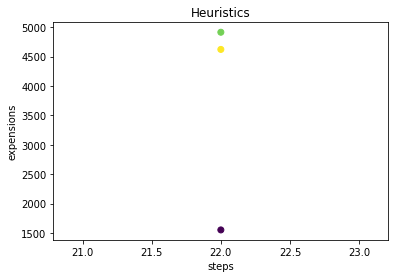

In [ ]:
import matplotlib.pyplot as plt

working=shuffle(3)

# steps_lin, expansions_lin, _, _, _ = aStarSearch(working, h1)
steps_man, expansions_man, _, _, _ = aStarSearch(working, h2)
steps_euclidean, expansions_euclidean, _, _, _ = aStarSearch(working, h3)
steps_multi, expansions_multi, _, _, _ = aStarSearch(working, multiweight)
print(steps_man,steps_euclidean,steps_multi)
print(expansions_man,expansions_euclidean,expansions_multi)

x = [steps_man,steps_euclidean,steps_multi]
y = [expansions_man,expansions_euclidean,expansions_multi]

color = np.random.rand(3)

# Plotting a scatter plot using argument 'data'
plt.scatter(x, y, c=color)

# Labeling the plot and showing it
plt.title('Heuristics')
plt.ylabel('expensions')
plt.xlabel('steps')
plt.show()

Comparando o multipeso com as outras heurísticas no gráfico acima(tabuleiro 3x3 para não demorar muito tempo rodando), podemos ver que há uma melhora no número de expansões, já que a combinação das heurísticas ainda que com peso igual já tornou o resultado melhor e ainda assim correto, dado que os steps seguem iguais. Para fazer como no artigo o EHA*, o objetivo agora é utilizar do algoritmo genético para fazer a calibragem de pesos entre as heurísticas por um número determinado de gerações ou se caso o algoritmo não evolua aconteça uma parada antes do final previsto, essas condições estão descritas na função main do problema. 

In [ ]:
# Teste de 4x4 vendo se as duas heurísticas batem e estão certas e teste de uma heurística dominar a outra(manhattan<=misplaced tiles)
example = [[1,2,6,3],[0,9,5,7],[4,13,10,11],[8,12,14,15]]
steps_misplaced, expansions_misplaced, _, _, _ = aStarSearch(example, heuristics[0])
steps_manhattan, expansions_manhattan, _, _, _ = aStarSearch(example, heuristics[1])
assert(expansions_manhattan <= expansions_misplaced)
assert(steps_misplaced == steps_manhattan == 9)


# Testes de expansão com tabuleiros aleatórios e determinados

In [ ]:
working=[[4, 3, 5], [2, 1, 0], [6, 7, 8]]
steps_multi, expansions_multi, _, _, _ = aStarSearch(working, multiweight)
print(expansions_multi)

In [ ]:
working=shuffle(3)
print(working)
steps_multi, expansions_multi, _, _, _ = aStarSearch(working, multiweight)
print(expansions_multi)

## Algoritmo Genético

Importando as bibliotecas necessárias para a implementação do código

In [ ]:
from numpy.random import default_rng
import numpy as np

In [ ]:
POPULATION = []
NEW_POPULATION = []
score_generation = []
score_points = []
score = 0

# Valores quaisquer
CROSSOVER_RATE = 90
MUTATION_RATE = 10
length_population = 1000
length_chromosome = 3

good_number = 0

In [ ]:
# Representação do cromossomo
class Chromosome:
    score = 0
  
    # Pesos de cada heurística
    #Colisões lineares
    weight1 = 1
    #Manhattan
    weight2 = 1
    #Distância euclidiana
    weight3 = 1

    def __init__(self, schema):
        self.schema = schema
  
    def __str__(self):
        toString = ''
        for ind in self.schema:
            toString += ind
        return toString

In [ ]:
# Fitness baseado no número de steps, quanto mais steps menor deve ser o peso, inverter colocando no denominador

def fitness(steps):
    return [1/step for step in steps]

In [ ]:
# Função de seleção

def selection(population, new_population):
    merged_list = []
    merged_list.extend(population)
    merged_list.extend(new_population)

    merged_list.sort(key=lambda schema: schema.score, reverse=False)

    return merged_list[:len(POPULATION)]

In [ ]:
# Função para crossover

def crossover(population):
    while len(NEW_POPULATION) < len(POPULATION):
        father = population[np.random.randint(0, len(population))].schema
        mother = population[np.random.randint(0, len(population))].schema
        yes = np.random.randint(0, 100)

        if father != mother and yes <= CROSSOVER_RATE:
            child = []
            cut = np.random.randint(1, len(father))
            child.append(father[:cut] + mother[cut:])
            child.append(mother[:cut] + father[cut:])
            for downward in child: 
                NEW_POPULATION.append(Chromosome(downward))

In [ ]:
# Função de mutação

def mutation(population):
    array = []
    rng = default_rng()
    numbers = rng.choice(range(1, length_chromosome-1), size= 2, replace=False)
  
    for ind in population:
        array_2 = []
        yes = np.random.randint(0, 100)
        if yes <= MUTATION_RATE:
            for i in range(len(ind.schema)):
                if i == int(numbers[0]):
                    array_2.append(ind.schema[numbers[1]])
                elif i == int(numbers[1]):
                    array_2.append(ind.schema[numbers[0]])
                else:
                    array_2.append(ind.schema[i])
            array.append(Chromosome(array_2))

    return array

In [ ]:
def init_population(length_population):
    random.seed()
    POPULATION = [Chromosome() for _ in range(length_population)]

# Iniciando o EHA*


In [ ]:
 # Modelo Base de EHA*
def modelEHA(ps, l):
  # Tamanho da população ps, Comprimento do cromossomo l
  population = InitPopulation(ps, l)

  while not(StopCondition()):

    # Usar a população para executar a busca EHA*
    population_results = AStarSearch(population, heuristic)
    # Classificar a população com base nos resultados
    population = EvaluateSolution(population, population_results)

    # O primeiro elemento é considerado o melhor candidato
    c = population[0]
    if not(StopCondition()):
      # Cria a próxima geração via seleção, mutação, e cruzamento
      children = GenChildren(population, ps)

    return c

def StopCondition():
  return False

def EvaluateSolution(population, population_results):
  return None

def InitPopulation(ps, l):
  return None



# Main para rodar o problema

In [ ]:
### Começando o main
##Lista do score/expansões para cada geração
list_score = []
flag = False
generation = 0
count_aux = 0

init_population(length_population, length_chromosome)
  
while True:
  score(POPULATION)
  crossover(POPULATION)
  NEW_POPULATION = mutation(NEW_POPULATION)
  score(NEW_POPULATION)
  POPULATION = selection(POPULATION,NEW_POPULATION)
  NEW_POPULATION.clear()
  
  for ind in POPULATION:
    list_score.append(ind.score)
  
  if generation == 0:
    good_number = min(list_score)
  
  if min(list_score) < good_number:
    good_number = min(list_score)
    count_aux+=1
  ### Parar quando chegar no número máximo ou quando não evolui por 3 vezes seguidas(good number serve para isso)
  if generation == 100 or count_aux == 3:
    flag=True 

  score_generation.append(generation)
  score_points.append((POPULATION[0].score))
  
  if flag:
    print("===================================================================")
    print(f'Individuo: {POPULATION[0].schema} e o score dele {POPULATION[0].score} geracao {generation}')
    print("===================================================================")
    break
    
  generation += 1